In [1]:
import numpy as np
import pandas as pd
from scipy.stats import expon
import math
import random
import popn_sim 
import matplotlib.pyplot as plt
from coal_prior import true_prior
random.seed(123)

In [2]:
#true
N = 50000
time = []
num = []
for i in range(N):
    n, e = true_prior()
    l = [x for x in e if x[-1]==0]
    time.append(e[-1][1])
    num.append(len(l)/2)
true_tmrca = sum(time)/N
true_number = sum(num)/N


(array([3.5475e+04, 1.0605e+04, 2.8340e+03, 0.0000e+00, 7.6500e+02,
        2.2100e+02, 0.0000e+00, 7.5000e+01, 2.3000e+01, 2.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

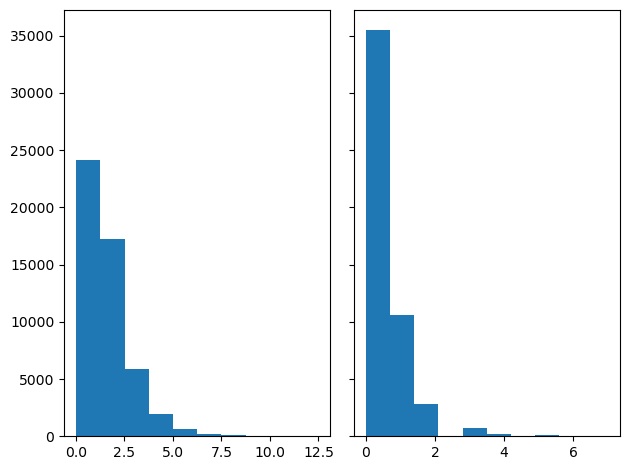

In [3]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(time)
axs[1].hist(num, bins=10)

In [69]:
nodes, events = popn_sim.popn_create()
for i in range(100):
    nodes, events, rjmcmc = popn_sim.mig_add(nodes, events)
print(nodes)
print(events)
for i in range(100):
    nodes, events, f, b = popn_sim.mig_resample(nodes, events)


{1: {'parents': [50, 51], 'children': [], 'time': 0, 'frac': 1}, 2: {'parents': [5], 'children': [], 'time': 0, 'frac': 1}, 3: {'parents': [5], 'children': [], 'time': 0, 'frac': 1}, 4: {'parents': [6], 'children': [], 'time': 0, 'frac': 1}, 5: {'parents': [20, 21], 'children': [3, 2], 'time': 0.038107666665801475, 'frac': 1}, 6: {'parents': [7], 'children': [4, 120], 'time': 0.6214517309974912, 'frac': 1}, 7: {'parents': [10], 'children': [6, 22], 'time': 0.682716470352232, 'frac': 1}, 8: {'parents': [175], 'children': [78], 'time': 0.3874505542157519, 'frac': 0.960410267559221}, 9: {'parents': [190], 'children': [78], 'time': 0.3874505542157519, 'frac': 0.03958973244077901}, 10: {'parents': [59, 60], 'children': [7, 177], 'time': 2.513712890182902, 'frac': 1}, 11: {'parents': [35, 36], 'children': [282], 'time': 1.0954104241514298, 'frac': 0.9333465521229599}, 12: {'parents': [23, 24], 'children': [282], 'time': 1.0954104241514298, 'frac': 0.06665344787704008}, 13: {'parents': [95, 9

In [52]:
def check(events):
    out = True
    for i in range(len(events)-1):
        if (abs(len(events[i][2]) - len(events[i+1][2])) != 1) and (abs(len(events[i][2]) - len(events[i+1][2])) != 0) :
            return False
    return True

In [70]:
check(events)


True